## Problem Statement

The task is to develop a predictive model that accurately predicts the probability of a team winning an IPL cricket match. Given historical match data, the model should be able to estimate the likelihood of a team winning a match.


- Dataset is taken from Kaggle website.
- IPL DATA (2008-2019)

## Import the data

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the Dataset
match = pd.read_csv(r"C:\Users\hp\Downloads\IPL_DATA\matches.csv")
delivery = pd.read_csv(r"C:\Users\hp\Downloads\IPL_DATA\deliveries.csv")

## Pre-processing

In [3]:
# display the DataFrame
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
match.describe(include="all")

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# display the DataFrame
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
delivery.shape

(179078, 21)

In [9]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [13]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Observations
The following inferences can be made:
- In dataframe match,each row represents a match played in IPL.
- In dataframe delivery, ball by ball details are given.Each row represent a ball played in a match.
- In dataframe match, 4 missing values in winner & umpire1 umpire2 umpire3 also have missing values.
- In dataframe delivery, player_dismissed, dismissal_kind, fielder have missing values.
- 7 Missing values are there in this variable city; These matches were played outside india Venue-Dubai International Cricket Stadium Therefore city is not mentioned.

## Feature selction 
- We are having 18 no. of variables in match dataset and 21 no. of variables in delivery dataset.
- Based on domain knowledge we required follwoing features i.e.
batting_team and bowling_team in second innings,
city, runs_left, balls_left, wickets_left, 
total_runs_x/Traget, crr, rrr, result(Win/lose).

In [15]:
#As we have two different columns that gives information of batsman_runs and team's total_runs
#Finding total runs scored in both the innings

total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [16]:
#FDisplay data of single match
match.iloc[754]

id                                   11414
Season                            IPL-2019
city                         Visakhapatnam
date                            10-05-2019
team1                       Delhi Capitals
team2                  Chennai Super Kings
toss_winner            Chennai Super Kings
toss_decision                        field
result                              normal
dl_applied                               0
winner                 Chennai Super Kings
win_by_runs                              0
win_by_wickets                           6
player_of_match               F du Plessis
venue                     ACA-VDCA Stadium
umpire1                      Sundaram Ravi
umpire2                     Bruce Oxenford
umpire3            Chettithody Shamshuddin
Name: 754, dtype: object

In [17]:
total_score_df.iloc[1524]

match_id      11414
inning            1
total_runs      155
Name: 1524, dtype: int64

In [18]:
total_score_df.iloc[1525]

match_id      11414
inning            2
total_runs      162
Name: 1525, dtype: int64

In [19]:
# We will filter the data as we required Total runs scored in first inning for model building.
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [20]:
#Additing 1 run to the total runs of first innong as the chasing team will required 1 extra run to win the match
total_score_df['total_runs'] = total_score_df['total_runs']+1

C:\Users\hp\AppData\Local\Temp\ipykernel_12548\1264769109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score_df['total_runs'] = total_score_df['total_runs']+1


In [21]:
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [22]:
#Merging 2 DataFrames as we required features from both the columns
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [23]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [24]:
#Check unique values in Dataset
for i in match_df:
    print("Unique values in ",i)
    print(match_df[i].unique())
    print("-----------------------------------------------------------------------------------------------------------------------")

Unique values in  id
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161

In [25]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Observations

- Currently some of the teams are not playing IPL.We will remove those teams.i.e.'Gujarat Lions','Rising Pune Supergiant','Kochi Tuskers Kerala','Kochi Tuskers Kerala','Rising Pune Supergiants'
- 'Delhi Capitals' and 'Delhi Daredevils' is a same team.The name has been change.We will replace the name in the dataset.
- 'Deccan Chargers' and 'Sunrisers Hyderabad' is a same team.The name has been change.We will replace the name in the dataset.
- City is having nan values

## Cleaning the Data

In [26]:
match_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
match_id             0
total_runs           0
dtype: int64

In [27]:
match_df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
match_id            int64
total_runs          int64
dtype: object

In [28]:
match_df.describe(include="all")

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119,756.000000,756.000000
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25,NaN,NaN
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon,NaN,NaN
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10,NaN,NaN
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN,1792.178571,163.384921
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN,3464.478148,30.948344
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,57.000000
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,189.750000,143.000000
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,378.500000,165.000000
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN,567.250000,184.000000


In [29]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [30]:
#Replacing 'Delhi Daredevils' by 'Delhi Capitals'
#Replacing 'Deccan Chargers' by 'Sunrisers Hyderabad' as both teams are same

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [31]:
#Only considering existing team.

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [32]:
match_df.shape

(641, 20)

- The Duckworth–Lewis–Stern method (DLS) is to calculate the target score (number of runs needed to win) for the team batting second in a limited overs cricket match interrupted by weather or other circumstances.
- We will consider only those matches where the entire match has been played to avoid noisy/imperfect data.

In [33]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [34]:
 match_df = match_df[match_df['dl_applied'] == 0]

In [35]:
match_df 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [36]:
match_df = match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [37]:
delivery_df = match_df.merge(delivery,on='match_id')

In [38]:
delivery_df.head(5)
#total_runs_x column comes from match_df that is sum of total_runs in inning 1 = TARGET GIVEN TO CHASE
#total_runs_y column comes from delivery that is total_runs scored per ball

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [39]:
delivery_df['total_runs_x'].iloc[0:10]

0    208
1    208
2    208
3    208
4    208
5    208
6    208
7    208
8    208
9    208
Name: total_runs_x, dtype: int64

In [40]:
delivery_df['total_runs_y'].iloc[0:10]

0    0
1    0
2    4
3    0
4    2
5    0
6    1
7    1
8    4
9    1
Name: total_runs_y, dtype: int64

In [41]:
delivery_df.shape

(149578, 24)

In [42]:
delivery_df.describe()

,match_id,total_runs_x,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y
count,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000,149578.000000
mean,2067.762478,166.107081,1.485533,10.202236,3.616561,0.000455,0.036931,0.005134,0.021500,0.004259,0.000067,1.250552,0.067891,1.318443
std,3714.739849,29.630770,0.502234,5.681119,1.807529,0.021317,0.251804,0.119278,0.197811,0.071855,0.018283,1.611558,0.345911,1.610372
min,1.000000,66.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,147.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,396.000000,166.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,186.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,251.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [43]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [44]:
(delivery_df["inning"] == 2).sum()

72413

In [45]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [46]:
#All second innings balls
delivery_df.shape

(72413, 24)

In [47]:
#Creating new variable/column current_score showing updated score after each ball
#Cummulative sum after each ball

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [48]:
#Creating new variable/column runs_left showing remaining runs after each ball based on cuurent score

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [49]:
#Creating new variable/columns balls_left show remaining balls after each ball

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [50]:
# Sorting by column 'balls_left'
delivery_df.sort_values(by=["match_id",'balls_left'],ascending=False).head(120)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
149454,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,1,F du Plessis,...,0,0,0,0,NaN,NaN,NaN,0,153,119
149455,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,2,F du Plessis,...,0,0,0,0,NaN,NaN,NaN,0,153,118
149456,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,3,F du Plessis,...,0,4,0,4,NaN,NaN,NaN,4,149,117
149457,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,4,F du Plessis,...,0,1,0,1,NaN,NaN,NaN,5,148,116
149458,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,5,SR Watson,...,0,0,0,0,NaN,NaN,NaN,5,148,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149569,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,...,0,0,0,0,NaN,NaN,NaN,140,13,8
149570,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,...,0,2,0,2,NaN,NaN,NaN,142,11,7
149571,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,...,0,4,4,8,NaN,NaN,NaN,150,3,6
149572,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,...,0,1,0,1,NaN,NaN,NaN,151,2,5


In [51]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [52]:
#Wickets left 

#replacing Nan values by string 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

#replacing other values i.e. Batsman name with 1
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

#same as total runs
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

#Creating new variable to get information of wickets left after every ball
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [53]:
#Creating new variable for Current Run Rate
#overs=(120 - balls_left)/6
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [54]:
#Creating new variable for Required Run Rate
#overs=(balls_left)/6
# rrr = runs left/overs left
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [55]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [56]:
#Creating new column result which gives value 1 if batting team wins else 0

delivery_df['result'] = delivery_df.apply(result,axis=1)

In [57]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [58]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [59]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,153,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,153,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,153,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,153,7.915966,-24.000000,0


In [60]:
#Shuffeling the Dataset as match wise data can be biased to the model

final_df = final_df.sample(final_df.shape[0])

In [61]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
138581,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,114,97,10,165,13.304348,7.051546,1


In [62]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,72413.000000,72413.000000,72413.000000,72413.000000,72413.000000,7.240800e+04,72413.000000
mean,93.258379,62.657078,7.535967,166.583956,7.439523,NaN,0.525624
std,50.021962,33.404593,2.138637,29.282200,2.275850,NaN,0.499346
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.257143,7.257143e+00,0.000000
50%,93.000000,63.000000,8.000000,166.000000,7.480519,9.000000e+00,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.682353,1.105263e+01,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,inf,1.000000


In [63]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
crr               0
rrr               5
result            0
dtype: int64

In [64]:
# Find rows with missing values
missing_rows_rrr = final_df[final_df['rrr'].isnull()]

In [65]:
missing_rows_rrr

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
25805,Kings XI Punjab,Kolkata Knight Riders,Port Elizabeth,0,0,6,154,7.70,NaN,1
66963,Mumbai Indians,Chennai Super Kings,Mumbai,0,0,2,174,8.70,NaN,1
74969,Chennai Super Kings,Royal Challengers Bangalore,Chennai,0,0,4,166,8.30,NaN,1
63300,Chennai Super Kings,Rajasthan Royals,Chennai,0,0,7,147,7.35,NaN,1
31387,Kolkata Knight Riders,Chennai Super Kings,Centurion,0,0,7,189,9.45,NaN,1


In [66]:
#It gives infinity runrate value therefore not considering last ball of second inning
final_df = final_df[final_df['balls_left'] != 0]

In [67]:
#removing missing values
final_df.dropna(inplace=True)

## Observation
- Here we can see the run_left are 0 and balls left are 0 as well,therefore rrr value is Nan and so we have dropped these rows.
- rrr was giving infinite value beacuse ball left were 0.so deleted those entries.
- Deleting missing values as we are considering cities in India.
- Deleting Missing values in Winner because match was called off in between.

### Checking for Outliers

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71342 entries, 18238 to 111598
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   batting_team  71342 non-null  object 
 1   bowling_team  71342 non-null  object 
 2   city          71342 non-null  object 
 3   runs_left     71342 non-null  int64  
 4   balls_left    71342 non-null  int64  
 5   wickets_left  71342 non-null  int32  
 6   total_runs_x  71342 non-null  int64  
 7   crr           71342 non-null  float64
 8   rrr           71342 non-null  float64
 9   result        71342 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 5.7+ MB


In [69]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,93.621065,62.878725,7.553251,166.726963,7.447791,10.568474,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,14.041845,0.499293
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.265782,7.267606,0.000000
50%,93.000000,64.000000,8.000000,166.000000,7.500000,9.000000,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.696385,11.032258,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000,1.000000


['runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']


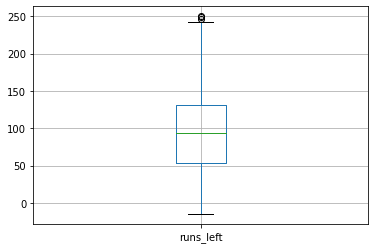

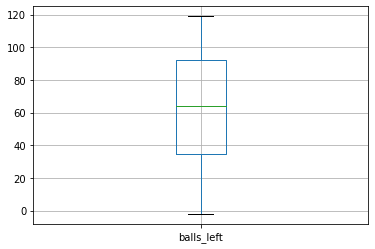

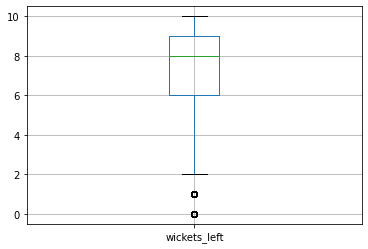

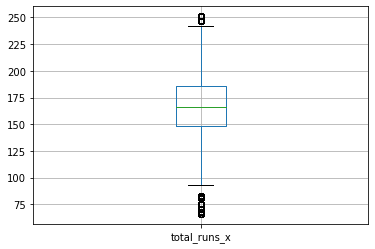

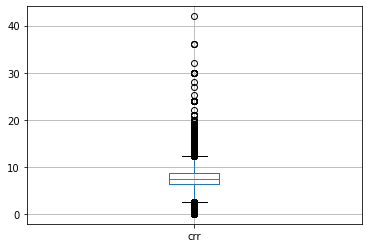

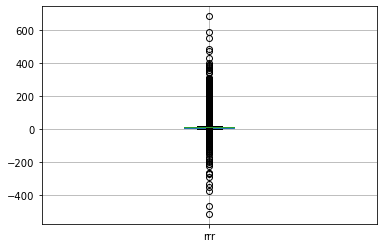

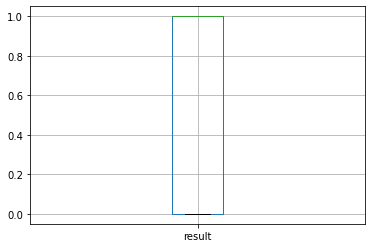

In [70]:
int_var=[]
for i in final_df.columns:
    if final_df.dtypes[i]=="int32":
        int_var.append(i)
    if final_df.dtypes[i]=="float64":
        int_var.append(i)
    if final_df.dtypes[i]=="int64":
        int_var.append(i)
print(int_var)

for i in int_var:
    final_df.boxplot(column=i)
    plt.show()

runs_left


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


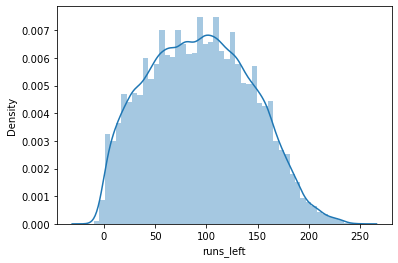

balls_left


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


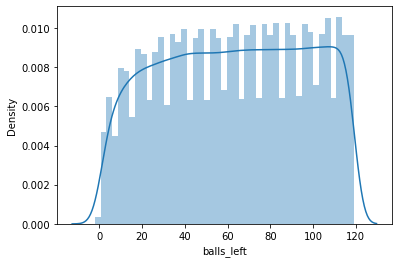

wickets_left


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


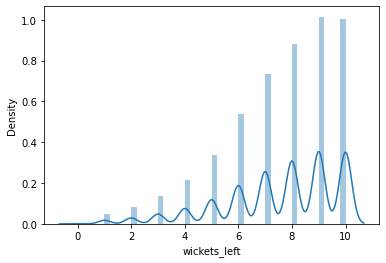

total_runs_x


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


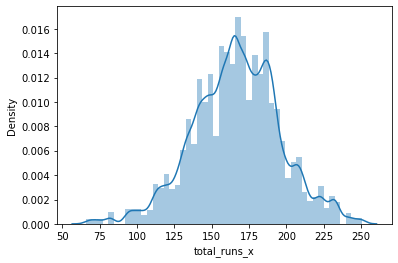

crr


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


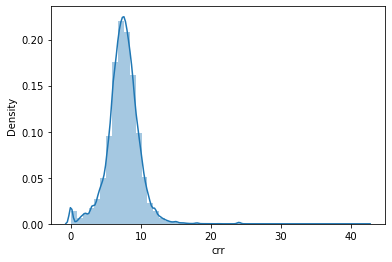

rrr


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


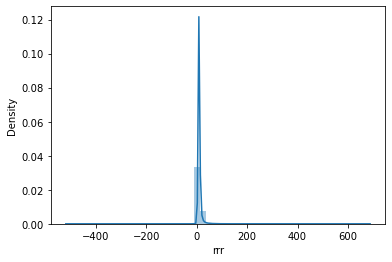

result


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


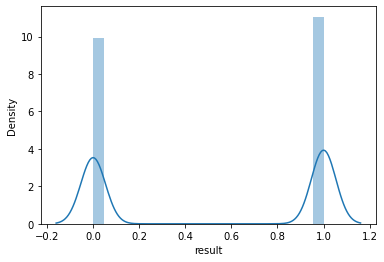

In [71]:
for i in int_var:
    print(i)
    sns.distplot(final_df[i])
    plt.show()

## Observations
- Balls left cannot be less than 0.Outliers are present in the data.
- required runrate is negative value that means outliers are present in the data.
- 75% or third quartile of current run rate is below 9 but max value is 42.This is a outlier.
- runs left can be negative.when chasing team score more runs than the given target.
- Graph of crr and rrr is skewed beacuse outliers are present in the data.

### Removing Outliers

In [72]:
#overs=(balls_left)/6
# rrr = runs left/overs left
final_df[final_df["rrr"]<-500]
#Here we can see the outliers present.
#required runrate will be negative when either your runs left are negative or balls_left are negative


,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
54561,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,86,-1,1,206,5.950413,-516.0,0


In [73]:
#Removing the outlierS
final_df=final_df[final_df["rrr"]>-500].reset_index(drop=True)

In [74]:
final_df[final_df["balls_left"]<0]
#balls left cannot be negative

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
1653,Chennai Super Kings,Rajasthan Royals,Jaipur,1,-1,4,159,7.834711,-6.0,1
2915,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,33,-1,1,199,8.231405,-198.0,0
4491,Mumbai Indians,Deccan Chargers,Mumbai,11,-2,2,136,6.147541,-33.0,0
6162,Delhi Daredevils,Royal Challengers Bangalore,Delhi,22,-1,1,216,9.619835,-132.0,0
6315,Chennai Super Kings,Kings XI Punjab,Cuttack,45,-1,4,232,9.272727,-270.0,0
...,...,...,...,...,...,...,...,...,...,...
66363,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,46,-1,4,228,9.024793,-276.0,0
67588,Kolkata Knight Riders,Rajasthan Royals,Cape Town,1,-1,2,151,7.438017,-6.0,0
67785,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,1,-1,1,156,7.685950,-6.0,1
68778,Deccan Chargers,Kolkata Knight Riders,Johannesburg,1,-1,6,161,7.933884,-6.0,1


In [75]:
#Removing the outlierS
final_df=final_df[final_df["balls_left"]>0].reset_index(drop=True)

In [76]:
final_df[final_df["crr"]>40]
#Here we can see the outliers present.
#75% or third quartile of current run rate is below 9 but max value is 42.There can be outliers present

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
16309,Rajasthan Royals,Mumbai Indians,Mumbai,164,118,10,178,42.0,8.338983,1


In [77]:
#Removing the outliers
final_df=final_df[final_df["crr"]<40].reset_index(drop=True)

In [78]:
final_df.shape

(71272, 10)

## Data Analysis Using Visualization 


([<matplotlib.patches.Wedge at 0x26b92fa0400>,
 [Text(-0.0931768645227918, 1.0960465646667124, '1'),
  Text(0.09317686452279143, -1.0960465646667124, '0')],
 [Text(-0.05082374428515916, 0.5978435807272976, '52.70%'),
  Text(0.050823744285158956, -0.5978435807272976, '47.30%')])

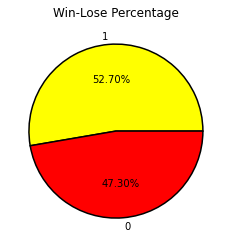

In [79]:
#To check data imabalance
databalance = final_df.result.value_counts()
plt.figure(figsize=(4,4))
plt.title("Win-Lose Percentage")
wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'}
plt.pie(databalance, labels=databalance.keys(), autopct="%.2f%%", colors=('Yellow', 'red'),wedgeprops=wedgeprops)

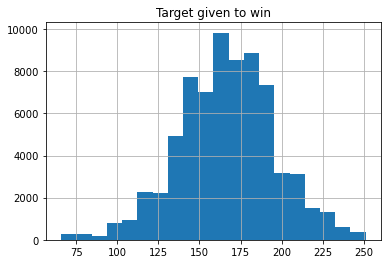

In [80]:
final_df["total_runs_x"].hist(bins=20)
plt.title("Target given to win")
plt.show()

              runs_left  balls_left  wickets_left  total_runs_x       crr  \
runs_left      1.000000    0.837853      0.488905      0.400892 -0.210209   
balls_left     0.837853    1.000000      0.751138     -0.067688 -0.174659   
wickets_left   0.488905    0.751138      1.000000     -0.157006  0.043178   
total_runs_x   0.400892   -0.067688     -0.157006      1.000000  0.273415   
crr           -0.210209   -0.174659      0.043178      0.273415  1.000000   
rrr           -0.036084   -0.253509     -0.377465      0.266511 -0.019129   
result        -0.256294    0.046205      0.322964     -0.402846  0.132923   

                   rrr    result  
runs_left    -0.036084 -0.256294  
balls_left   -0.253509  0.046205  
wickets_left -0.377465  0.322964  
total_runs_x  0.266511 -0.402846  
crr          -0.019129  0.132923  
rrr           1.000000 -0.255194  
result       -0.255194  1.000000  


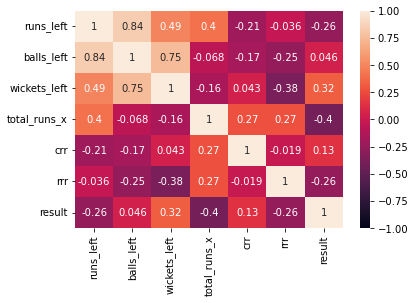

In [81]:
#Checking multicollienearity Between the independent variables
# multicollienearity is the relationship amongst independent variables
U=final_df[['runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]
corr_df  = U.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

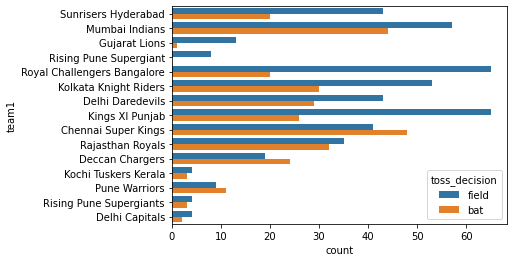

In [82]:
sns.countplot(y='team1',hue='toss_decision',data=match)
plt.show()

In [83]:
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


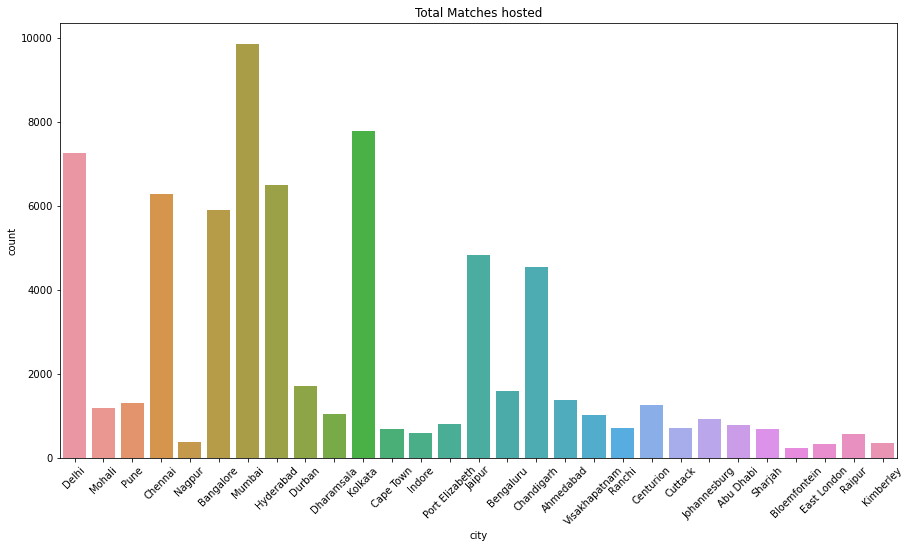

In [118]:
plt.figure(figsize=(15,8))
plt.title("Total Matches hosted")
sns.countplot(final_df.city)
plt.xticks(rotation = 45)
plt.show()

In [85]:
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


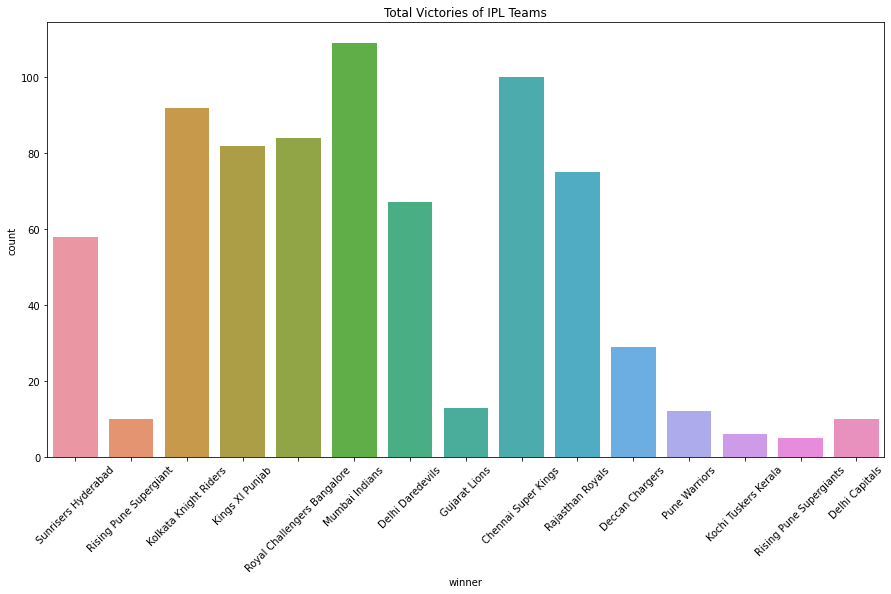

In [119]:
plt.figure(figsize=(15,8))
plt.title("Total Victories of IPL Teams")
sns.countplot(match.winner)
plt.xticks(rotation = 45)
plt.show()

In [87]:
teamcount_per_season = match.groupby('Season')['winner'].value_counts()
teamcount_per_season.head(120)

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

([<matplotlib.patches.Wedge at 0x26b96842790>,
 [Text(0.9879111799530969, 0.4837680234613281, 'Mumbai Indians'),
  Text(0.26393358858840527, 1.0678665931729705, 'Chennai Super Kings'),
  Text(-0.584123164342328, 0.932094484952414, 'Kolkata Knight Riders'),
  Text(-1.058450924134978, 0.29946893194087976, 'Royal Challengers Bangalore'),
  Text(-1.005397793117458, -0.4462905752920907, 'Kings XI Punjab'),
  Text(-0.524605323356602, -0.9668450003521325, 'Rajasthan Royals'),
  Text(0.10553204184873356, -1.0949260194840733, 'Delhi Daredevils'),
  Text(0.6376088225019216, -0.8963565080188314, 'Sunrisers Hyderabad'),
  Text(0.9146165949894981, -0.6111272242093432, 'Deccan Chargers'),
  Text(1.007253493369899, -0.44208641699800627, 'Gujarat Lions'),
  Text(1.0478530986488637, -0.3346698128782679, 'Pune Warriors'),
  Text(1.0741461813830273, -0.23708644208444513, 'Rising Pune Supergiant'),
  Text(1.0901852418806335, -0.14661561439923335, 'Delhi Capitals'),
  Text(1.0975435690056097, -0.0734718594

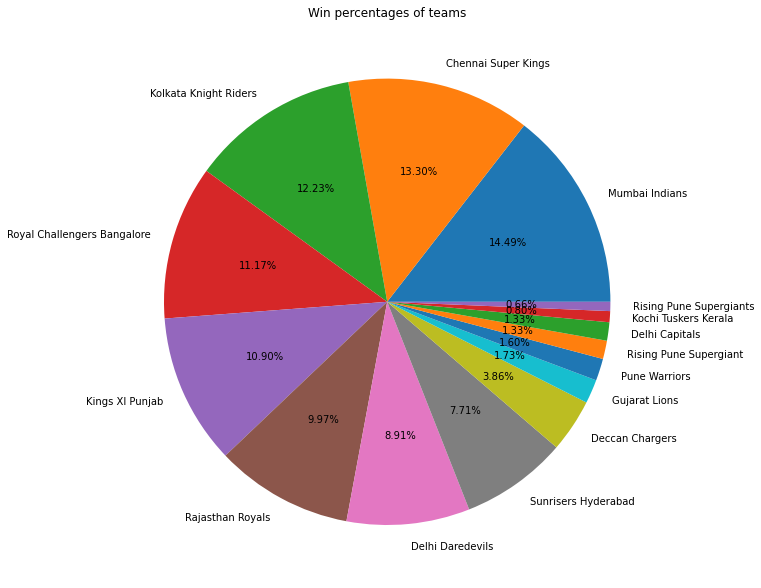

In [122]:
win_count = match.winner.value_counts()
plt.figure(figsize=(10,12))
plt.title("Win percentages of teams")
plt.pie(win_count,labels=win_count.keys(),autopct="%.2f%%")

## Observations:
- Using Histogram we can conclude that Target given to win is normally distributed.Most of the time target given to chase is between 150 to 200 runs.
- In Heatmap we can see that required runs to win always reduces ball after ball.Run_left can be equal after single ball but cannot increase.
- We have balanced data with categories win and lose.
- The Mumbai city has hosted the most number of IPL matches,101 matchesfollowed by Kolkata and Delhi.
- Mumbai Indians is the most successful team as they have won the maximum number of IPL matches -109 overall more than 14% matches followed by Chennai Super Kings and Kolkata Knight Riders.
- MI,SRH,GL,RCB,KKR,DD,KXIP,RR,DC mostly like to choose field first
- while CSK like to choose bat first.

## Model Selection

THIS IS A CLASSIFICATION PROBLEM
but the output required is in the form of probabilities or percentages.
The algorithms which are capable to provide this required results are:
- Logistic Regression
- Random forest
- KNN

### Logistic regression

#### Fine-tune the Model : Checking value for random state which gives max accuracy

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
trf = ColumnTransformer([('trf',OneHotEncoder
                          (sparse=False,drop='first'),
                          ['batting_team','bowling_team','city'])],remainder='passthrough')
#step1 would be transformer and step2 would be logistic regression

scores=[]
for i in range(500):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=i)
    pipe = Pipeline(steps=[('step1',trf),
    ('step2',LogisticRegression(solver="liblinear"))])
    pipe.fit(X_train,Y_train)
    Y_pred=pipe.predict(X_test)
    scores.append(accuracy_score(Y_test,Y_pred))

In [90]:
rs=np.argmax(scores)
rs

354

In [91]:
scores[rs]
#np.argmax(scores)

0.8129077516660821

In [92]:
#random state value selected after fine tuning.
#resulted in better accuracy score and reduction in Type2 error.
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=rs)

In [93]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
15052,Kings XI Punjab,Royal Challengers Bangalore,Durban,52,31,7,146,6.337079,10.064516
5310,Rajasthan Royals,Royal Challengers Bangalore,Centurion,65,74,9,106,5.347826,5.270270
11775,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,111,98,9,130,5.181818,6.795918
54491,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,85,60,8,180,9.500000,8.500000
13032,Royal Challengers Bangalore,Delhi Daredevils,Delhi,142,77,9,185,6.000000,11.064935
...,...,...,...,...,...,...,...,...,...
48236,Kolkata Knight Riders,Rajasthan Royals,Kolkata,27,51,8,82,4.782609,3.176471
29269,Chennai Super Kings,Kings XI Punjab,Mumbai,110,65,7,227,12.763636,10.153846
25247,Kings XI Punjab,Delhi Daredevils,Mohali,32,24,6,173,8.812500,8.000000
41397,Chennai Super Kings,Rajasthan Royals,Chennai,128,66,8,212,9.333333,11.636364


In [94]:
Y_train

15052    0
5310     1
11775    1
54491    0
13032    0
        ..
48236    1
29269    0
25247    1
41397    0
4065     1
Name: result, Length: 57017, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [96]:
#To convert Categorical values into Numeric using OneHotEncoder
#Column tranformer-Here we transforming columns by giving column name as input
#and remainder = passthrough means we are passing rest of columns as it is
#We can use simple imputer also to handle nan values but here we dont have nan values
trf = ColumnTransformer([('trf',OneHotEncoder
                          (sparse=False,drop='first'),
                          ['batting_team','bowling_team','city'])],remainder='passthrough')

In [97]:
#step1 would be transformer and step2 would be logistic regression
pipe = Pipeline(steps=[('step1',trf),
    ('step2',LogisticRegression(solver="liblinear"))])

- For solver='liblinear', Accuracy score is 81 , Type1 error:1427 ,Type2 error:1192
- For solver='newton-cg', Accuracy score is 80 , Type1 error:1429 ,Type2 error:1352
- For solver='lbfgs', Accuracy score is 79
- For solver='sag', Accuracy score is 78
- For solver='saga', Accuracy score is 77

In [98]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [99]:
Y_pred = pipe.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the Logistic model:",acc)

[[5315 1388]
 [1279 6273]]
classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      6703
           1       0.82      0.83      0.82      7552

    accuracy                           0.81     14255
   macro avg       0.81      0.81      0.81     14255
weighted avg       0.81      0.81      0.81     14255

Accuracy of the Logistic model: 0.8129077516660821


In [101]:
Y_pred[0:120]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [102]:
Y_test[0:120]

57673    0
45879    1
48923    1
38106    1
34695    0
        ..
6133     0
57462    0
28704    0
9774     1
3361     0
Name: result, Length: 120, dtype: int64

In [103]:
pipe.predict_proba(X_test)[6]

array([0.01207832, 0.98792168])

In [104]:
new_df = pd.DataFrame()
new_df = X_test.copy()
new_df["Actual_result"]=Y_test
new_df["Predicted_result"]=Y_pred
new_df = new_df.reset_index().drop("index",axis=1)
new_df.head(20)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,Actual_result,Predicted_result
0,Kings XI Punjab,Rajasthan Royals,Chandigarh,181,115,10,184,3.600000,9.443478,0,0
1,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,95,73,10,170,9.574468,7.808219,1,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,75,31,7,211,9.168539,14.516129,1,0
3,Chennai Super Kings,Rajasthan Royals,Chennai,121,74,9,186,8.478261,9.810811,1,0
4,Rajasthan Royals,Kings XI Punjab,Mohali,103,69,9,191,10.352941,8.956522,0,1
5,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,149,62,5,199,5.172414,14.419355,0,0
6,Chennai Super Kings,Rajasthan Royals,Chennai,10,17,9,148,8.038835,3.529412,1,1
7,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,51,61,7,118,6.813559,5.016393,1,1
8,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,98,47,6,172,6.082192,12.510638,0,0
9,Delhi Daredevils,Mumbai Indians,Delhi,172,92,9,219,10.071429,11.217391,0,0


- Logistic regression is most suitable for binary classification problems.
- It gives the probability of belonging to one of two classes
- it uses sigmoid fuction which provides a smooth S-shaped curve.
- As we are having large no. of datasets,Logistic Regression helps to deal the data effectively.

# RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = Pipeline(steps=[('step1',trf),
    ('step2',RandomForestClassifier())])

pipe2.fit(X_train,Y_train)

Y_pred2 = pipe2.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred2)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred2))

acc = accuracy_score(Y_test,Y_pred2)
print("Accuracy of the Random Forest model:",acc)

[[6697    6]
 [  10 7542]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6703
           1       1.00      1.00      1.00      7552

    accuracy                           1.00     14255
   macro avg       1.00      1.00      1.00     14255
weighted avg       1.00      1.00      1.00     14255

Accuracy of the Random Forest model: 0.9988775868116451


In [107]:
pipe2.predict_proba(X_test)[6]

array([0., 1.])

- Reason for not using Random Forest is that - unlike sigmoid function which gives you probability of win for both the team after every ball Random forest is showing extreme values for probability which are close to 1 or 0
- We consider smoothern values so that after every ball probability will not differ drastically so Logistic Regression is preferable.
- As we are getting accuracy of 99% ,there are chances of overfitting.

# KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
pipe3 = Pipeline(steps=[('step1',trf),
    ('step2',KNeighborsClassifier(n_neighbors=10,metric="euclidean"))])

pipe3.fit(X_train,Y_train)

Y_pred3 = pipe3.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred3)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred3))

acc = accuracy_score(Y_test,Y_pred3)
print("Accuracy of the KNN model:",acc)

[[5862  841]
 [1327 6225]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      6703
           1       0.88      0.82      0.85      7552

    accuracy                           0.85     14255
   macro avg       0.85      0.85      0.85     14255
weighted avg       0.85      0.85      0.85     14255

Accuracy of the KNN model: 0.8479130129779024


- Dealing with the large number of observations.Training a KNN model is time-consuming 
- and take more time to give predictions
- As we have more number of observations,KNN is a lazy learner.

## Make Prediction

In [110]:
def match_summary(row):
    print("Batting Team:" + row['batting_team'] + " | Bowling Team:" + row['bowling_team'] + " | Target: " + str(row['total_runs_x']))
    

- To Study a particular match over by over

In [111]:
#pass dataset ,match id of match need to be check and model
#so this function will peovide win probability after each over

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets_left = list(temp_df['wickets_left'].values)
    new_wickets_left = wickets_left[:]
    new_wickets_left.insert(0,10)
    wickets_left.append(0)
    w_left = np.array(wickets_left)
    nw_left = np.array(new_wickets_left)
    temp_df['wickets_in_over'] = (nw_left - w_left)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [112]:
#Giving Over by Over Wicket

temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,57.3,42.7
10467,2,8,0,52.3,47.7
10473,3,1,0,57.8,42.2
10479,4,7,1,68.0,32.0
10485,5,12,0,58.4,41.6
10491,6,13,0,46.6,53.4
10497,7,9,0,40.9,59.1
10505,8,15,0,27.2,72.8
10511,9,7,0,25.1,74.9
10518,10,17,0,13.4,86.6


Text(0.5, 1.0, 'Win-Lose Probability per over for Target-179')

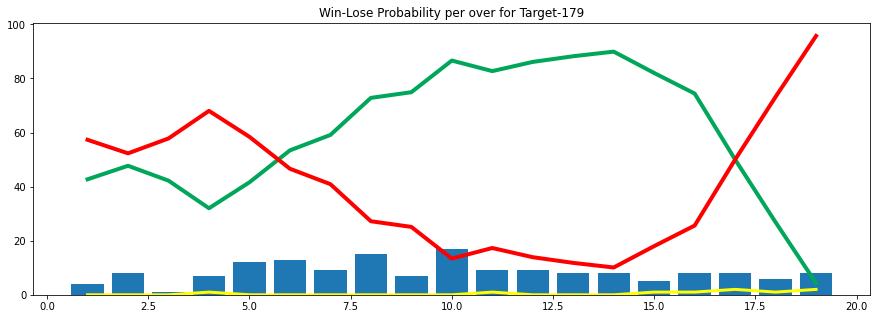

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title("Win-Lose Probability per over for Target-" + str(target))

## Observation
- Blue bars showing Runs per Over
- Yellow line showing falling of wickets per over
- Green line showing Winning Probalibility
- Red line showing Losing Probalibility

In [114]:
#select teams for validation
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [115]:
#predict we give in the form of dataframe
#This is how we will predict one row
pipe.predict_proba(pd.DataFrame([["Rajasthan Royals","Chennai Super Kings","Jaipur",100,60,5,200,10,10]],columns=['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'crr', 'rrr']))

array([[0.5946451, 0.4053549]])

## Execution

In [116]:
import pickle
#In pickle first we write down the name of the object that we want to dump here it is pipe
#Then we will open one file by giving path and name of that file
#wb is write binary mode.File will be open in write binary mode
pickle.dump(pipe,open('pipe.pkl','wb'))

- We have decided to continue with Logistic regression model as it is most suitable for the data we have.
- Logistic Regression works best on binary classification problem
- We are using streamlit.This will run a server and we can get prediction on that interface.